# Matplotlib Animation in python
https://www.youtube.com/watch?v=7RgoHTMbp4A

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import random

x_values = []
y_values = []

for _ in range(1000):
  plt.clf()
  x_values.append(random.randint(0, 100))
  y_values.append(random.randint(0, 100))
  
  plt.xlim(0, 100)
  plt.ylim(0, 100)
  plt.scatter(x_values, y_values, color="black")
  plt.pause(0.001)

plt.show()

# Animating LinearRegression Line


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import random

reg = LinearRegression()
x_values = []
y_values = []

for i in range(1000):
  plt.clf()
  x_values.append(random.randint(0, 100))
  y_values.append(random.randint(0, 100))
  
  x = np.array(x_values).reshape(-1, 1)
  y = np.array(y_values).reshape(-1, 1)

  if i%5==0:
    reg.fit(x, y)
    plt.xlim(0, 100)
    plt.ylim(0, 100)
    plt.scatter(x_values, y_values, color="black")
    plt.plot(list(range(100)), reg.predict(np.array([x for x in range(100)]).reshape(-1, 1)))
    plt.pause(0.001)

plt.show()

# Bar plot animation

In [ ]:
import matplotlib.pyplot as plt
import random

values = [0] * 50

for i in range(50):
  values[i] = random.randint(0, 100)
  plt.xlim(0, 50)
  plt.ylim(0, 100)
  plt.bar(list(range(50)), values)
  plt.pause(0.0001)

plt.show()

# Creating gif plot using matplotlib
https://www.youtube.com/watch?v=bNbN9yoEOdU

[gif @ 0x561f007ba600] GIF muxer supports only a single video GIF stream.
Could not write header for output file #0 (incorrect codec parameters ?): Invalid argument
Error initializing output stream 0:0 -- 



CalledProcessError: ignored

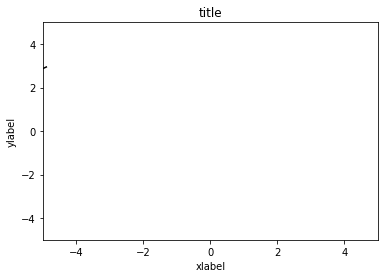

In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter

# This needs to be changed for your code
#plt.rcParams['animation.ffmpeg_path'] = 'C:\\Users\\spsha\\Desktop\\ffmpeg-4.4-full_build\\bin\\ffmpeg.exe'

# This is the final example I showed in the code - notice I have 2 "cursor marks" not shown in the video
fig = plt.figure()
l, = plt.plot([], [], 'k-')

plt.xlabel('xlabel')
plt.ylabel('ylabel')
plt.title('title')

plt.xlim(-5, 5)
plt.ylim(-5, 5)

def func(x):
    return np.sin(x)*3

def func2(x):
    return np.cos(x)*3

metadata = dict(title='Movie', artist='codinglikemad')
writer = FFMpegWriter(fps=15, metadata=metadata)


xlist = []
xlist2 = []
ylist = []
ylist2 = []

with writer.saving(fig, "sinWave2.gif", 100):

    # Plot the first line and cursor
    for xval in np.linspace(-5,5,100):
        xlist.append(xval)
        ylist.append(func(xval))

        l.set_data(xlist,ylist)

        writer.grab_frame()

# Animation

In [ ]:
import numpy as np
import matplotlib
# matplotlib.use("Agg") # You can uncomment this line to have a totally non-gui experience - useful for webserver use where the file is rendered and shown to a user.
import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter, PillowWriter

# This will need to be changed to match your directory.
#plt.rcParams['animation.ffmpeg_path'] = 'C:\\Users\\spsha\\Desktop\\ffmpeg-4.4-full_build\\bin\\ffmpeg.exe'

# To make sure your example looks like mine, set the random seed. Helps with fine tuning the graph too.
np.random.seed(102434201)

metadata = dict(title='Movie', artist='codinglikemad')
writer = PillowWriter(fps=15, metadata=metadata)
#writer = FFMpegWriter(fps=15, metadata=metadata)

fig = plt.figure()
plt.xlim(-8, 8)
plt.ylim(-8, 8)

# Generate some random linear data to fit:
def func(x):
    return x*1.2 + 0.1 + np.random.normal(0,2, x.shape)

x = np.random.uniform(-7,7,10)
x = np.sort(x) # Sort the x values here so we get a nice left to right progression in the animation
y = func(x)

coeff = np.polyfit(x,y,1)
print(coeff)
xline = np.linspace(-6,6,40) # This controls how long the animation takes below.
yline = np.polyval(coeff, xline)

lPnt, = plt.plot(x, y, 'o')
l, = plt.plot(xline, yline, 'k-', linewidth=3)

plt.show()
# You need to close the figure for the 2nd half of the script to run - remove the plotting above if you want to generate without intervention.


fig = plt.figure()
plt.xlim(-10, 10)
plt.ylim(-10, 10)

lPnt, = plt.plot([], [], 'o')
l, = plt.plot([], [], 'k-', linewidth=3)

xLineList = []
yLineList = []

xPntList = []
yPntList = []

# We generate each plot sequentially here
with writer.saving(fig, "fitPlot.gif", 100):

    # First show the data points
    for xval,yval in zip(x,y):

        xPntList.append(xval)
        yPntList.append(yval)

        lPnt.set_data(xPntList,yPntList)
        l.set_data(xLineList,yLineList)

        # Double up the frames to slow things down a bit here.
        writer.grab_frame()
        writer.grab_frame()

    # Add the line fit
    for xval,yval in zip(xline,xline):

        xLineList.append(xval)
        yLineList.append(yval)

        lPnt.set_data(xPntList,yPntList)
        l.set_data(xLineList,yLineList)

        writer.grab_frame()

    # We pad at the end to create some "pauseing space"
    for ii in range(10):
        writer.grab_frame()


# Animation

In [ ]:
import numpy as np
import matplotlib
# matplotlib.use("Agg") # useful for a webserver case where you don't want to ever visualize the result live.
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter, PillowWriter

# Change to reflect your file location!
#plt.rcParams['animation.ffmpeg_path'] = 'C:\\Users\\spsha\\Desktop\\ffmpeg-4.4-full_build\\bin\\ffmpeg.exe'


# Fixing random state for reproducibility
np.random.seed(19680801)


metadata = dict(title='Movie', artist='codinglikemad')
writer = PillowWriter(fps=15, metadata=metadata)
#writer = FFMpegWriter(fps=15, metadata=metadata)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

plt.xlim(-5, 5)
plt.ylim(-5, 5)


def func(x,y,r,t):
    return np.cos(r/2+t)*np.exp(-np.square(r)/50)

xvec = np.linspace(-10, 10, 1000)
yvec = np.linspace(-10, 10, 1000)

xlist, ylist = np.meshgrid(xvec, yvec)

rlist = np.sqrt( np.square(xlist) + np.square(ylist) )

with writer.saving(fig, "exp3d.gif", 100):
    for tval in np.linspace(0,20,160):
        print(tval)
        zval = func(xlist,ylist,rlist, tval)
        ax.set_zlim(-1, 1)
        ax.plot_surface(xlist,ylist,zval,cmap=cm.viridis)

        writer.grab_frame()
        plt.cla()

# [A guide to an efficient way to build neural network architectures- Part I: Hyper-parameter selection and tuning for Dense Networks using Hyperas on Fashion-MNIST](https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-i-hyper-parameter-8129009f131b)



In [1]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
X_train.shape

(60000, 28, 28)

In [3]:
y_train.shape

(60000,)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
y_test.shape

(10000,)

In [16]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
X_train.head()

AttributeError: ignored

In [9]:
type(X_train)

numpy.ndarray

In [13]:
a = X_train[0]

In [14]:
a.shape


(28, 28)

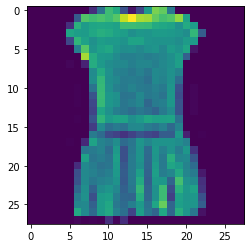

In [22]:
plt.imshow(np.array(X_train[3]))

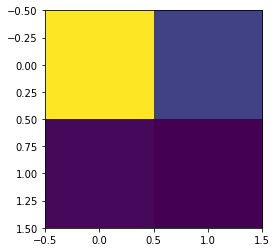

In [40]:
a = np.random.randint(255, size=(2, 2))
plt.imshow(a)

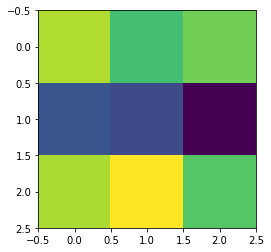

In [41]:
a = np.random.randint(255, size=(3, 3))
plt.imshow(a)

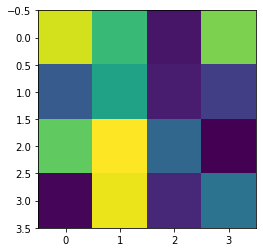

In [42]:
a = np.random.randint(255, size=(4, 4))
plt.imshow(a)

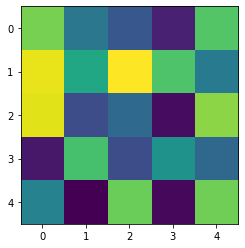

In [43]:
a = np.random.randint(255, size=(5, 5))
plt.imshow(a)

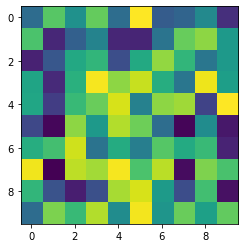

In [44]:
a = np.random.randint(255, size=(10, 10))
plt.imshow(a)

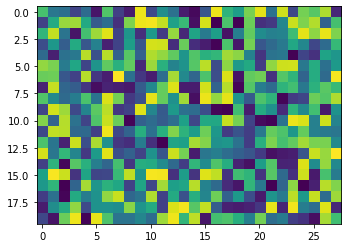

In [45]:
a = np.random.randint(255, size=(20, 28))
plt.imshow(a)

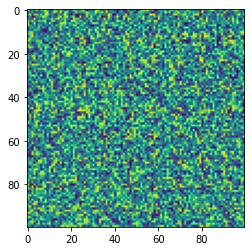

In [46]:
a = np.random.randint(255, size=(100, 100))
plt.imshow(a)

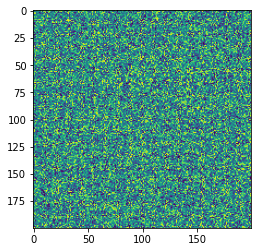

In [47]:
a = np.random.randint(255, size=(200, 200))
plt.imshow(a)

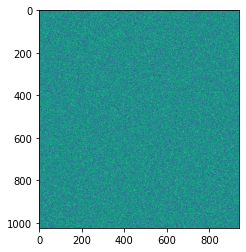

In [48]:
a = np.random.randint(255, size=(1024, 940))
plt.imshow(a)

In [49]:
fashion_mnist.load_data?

**Signature**: fashion_mnist.load_data()

Docstring:
Loads the Fashion-MNIST dataset.

This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories,
along with a test set of 10,000 images. This dataset can be used as
a drop-in replacement for MNIST.

The classes are:

| Label | Description |
|:-----:|-------------|
|   0   | T-shirt/top |
|   1   | Trouser     |
|   2   | Pullover    |
|   3   | Dress       |
|   4   | Coat        |
|   5   | Sandal      |
|   6   | Shirt       |
|   7   | Sneaker     |
|   8   | Bag         |
|   9   | Ankle boot  |

Returns:
  Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.

**x_train**: uint8 NumPy array of grayscale image data with shapes
  `(60000, 28, 28)`, containing the training data.

**y_train**: uint8 NumPy array of labels (integers in range 0-9)
  with shape `(60000,)` for the training data.

**x_test**: uint8 NumPy array of grayscale image data with shapes
  (10000, 28, 28), containing the test data.

**y_test**: uint8 NumPy array of labels (integers in range 0-9)
  with shape `(10000,)` for the test data.

In [50]:
fashion_mnist?

[[ 98 232 198]
 [242 191   7]]


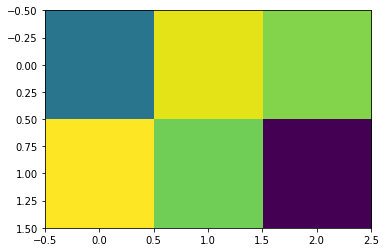

In [63]:
A = np.matrix(np.random.randint(255, size=(2, 3)))
plt.imshow(A)

print(A)

[[233  42]
 [ 33  81]
 [ 65  17]]


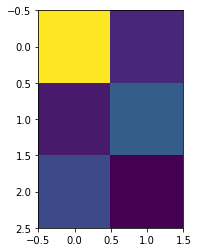

In [64]:
B = np.matrix(np.random.randint(255, size=(3, 2)))
plt.imshow(B)
print(B)

[[43360 26274]
 [63144 25754]]


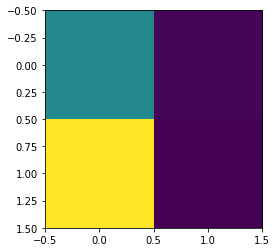

In [65]:
C = A * B
plt.imshow(C)
print(C)

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=12345)

In [67]:
train_test_split?

Signature: train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation and
``next(ShuffleSplit().split(X, y))`` and application to input data
into a single call for splitting (and optionally subsampling) data in a
oneliner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

train_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the
    proportion of the dataset to include in the train split. If
    int, represents the absolute number of train samples. If None,
    the value is automatically set to the complement of the test size.

random_state : int, RandomState instance or None, default=None
    Controls the shuffling applied to the data before applying the split.
    Pass an int for reproducible output across multiple function calls.
    See :term:`Glossary <random_state>`.

shuffle : bool, default=True
    Whether or not to shuffle the data before splitting. If shuffle=False
    then stratify must be None.

stratify : array-like, default=None
    If not None, data is split in a stratified fashion, using this as
    the class labels.
    Read more in the :ref:`User Guide <stratification>`.


In [69]:
X_train = X_train.reshape(48000, 784)
X_val = X_val.reshape(12000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_val /= 255
X_test/= 255

In [74]:
from keras.utils.np_utils import to_categorical
nb_classes = 10 
Y_train = to_categorical(y_train, nb_classes)
Y_val = to_categorical(y_val, nb_classes)
Y_test= to_categorical(y_test, nb_classes)

In [75]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
plt.imshow(Y_train)

In [85]:
from keras.models import Sequential
from keras.layers import Activation, Dense
import keras
model = Sequential([
 Dense(10,input_shape=(784,),activation='softmax')
])
model.compile(optimizer=keras.optimizers.SGD(lr=0.1),
 loss='categorical_crossentropy',
 metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [99]:
def http_error(status):
  match status:
      case 400:
          return "Bad request"
      case 404:
          return "Not found"
      case 418:
          return "I'm a teapot"
      case _:
          return "Something's wrong with the internet"

SyntaxError: ignored

In [92]:
!python --version

Python 3.7.15


# Updating Python version in google colab

```python
#install python 3.9
!sudo apt-get update -y
!sudo apt-get install python3.9

#change alternatives
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.7 1
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.9 2

#check python version
!python --version
#3.9.6
```

In [96]:
# install python 3.9
!sudo apt-get update -y
!sudo apt-get install python3.10

# change alternatives
#!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.7 1
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.10 6

# check python version
!python --version
# 3.9.6

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [1,038 kB]
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1,563 kB]
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic

In [95]:
!python --version

Python 3.7.15


In [102]:
a = 2
match (a):
  case 1:
    print("one")
  case 2:
    print("two")

SyntaxError: ignored

In [103]:
def fun(a: int, b: float) -> int:
  return a + b

print(fun(12, 3.5))
print(fun(12, 15))
print(fun(4.5, 5.6))

15.5
27
10.1


In [104]:
def msg(name: str)-> str:
  return f"Hello {name}!!! Welcome to Jain Deemed to be University."

print(msg(12))

Hello 12!!! Welcome to Jain Deemed to be University.


In [105]:
import numpy as np

In [106]:
np.array?

# array(object, dtype=None, *, copy=True, order='K', subok=False, ndmin=0,      like=None)


In [107]:
c = np.array([[1, 2], [3, 4]], dtype=complex)
print(c)

[[1.+0.j 2.+0.j]
 [3.+0.j 4.+0.j]]


In [110]:
np.zeros?

# zeros(shape, dtype=float, order='C', *, like=None)

Return a new array of given shape and type, filled with zeros.

In [108]:
np.zeros((3, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [111]:
np.ones?

# Signature: np.ones(shape, dtype=None, order='C', *, like=None)
Docstring:
Return a new array of given shape and type, filled with ones.

In [109]:
np.ones((2, 3, 4), dtype=np.int16)

array([[[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]], dtype=int16)

# Docstring: empty(shape, dtype=float, order='C', *, like=None)

Return a new array of given shape and type, without initializing entries.

In [113]:
np.empty?

In [112]:
np.empty((2, 3))

array([[-5.00000e-01,  4.79995e+04, -5.00000e-01],
       [-5.00000e-01,  9.50000e+00,  4.79995e+04]])

# Docstring: arange([start,] stop[, step,], dtype=None, *, like=None)

Return evenly spaced values within a given interval.

In [115]:
np.arange?

In [114]:
np.arange(10, 30, 5)

array([10, 15, 20, 25])

# Signature: np.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
Docstring:
Return evenly spaced numbers over a specified interval.

Returns `num` evenly spaced samples, calculated over the
interval [`start`, `stop`].

The endpoint of the interval can optionally be excluded.

In [117]:
np.linspace?

In [116]:
np.linspace(0, 2, 9)

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

# Signature: np.zeros_like(a, dtype=None, order='K', subok=True, shape=None)
Docstring:
Return an array of zeros with the same shape and type as a given array.

In [118]:
np.zeros_like?

In [119]:
x = np.arange(6)
x = x.reshape((2, 3))
print(x)

print(np.zeros_like(x))

[[0 1 2]
 [3 4 5]]
[[0 0 0]
 [0 0 0]]


# Signature: np.ones_like(a, dtype=None, order='K', subok=True, shape=None)
Docstring:
Return an array of ones with the same shape and type as a given array.

In [120]:
np.ones_like?

In [121]:
x = np.arange(6)
x = x.reshape((2, 3))
print(x)

print(np.ones_like(x))

[[0 1 2]
 [3 4 5]]
[[1 1 1]
 [1 1 1]]


# Docstring: empty_like(prototype, dtype=None, order='K', subok=True, shape=None)

Return a new array with the same shape and type as a given array.

In [122]:
np.empty_like?

In [128]:
a = np.array([[1,2,3], [4,5,6]])   
print(a)                      # a is array-like
print("np.empty_like(a): ", np.empty_like(a))

[[1 2 3]
 [4 5 6]]
np.empty_like(a):  [[146298256         0         0]
 [        0         0         0]]


numpy.random.Generator.rand, numpy.random.Generator.randn, fromfunction, fromfile

In [133]:
np.random.rand?

In [134]:
np.random.randn?

In [135]:
np.fromfunction?

In [136]:
np.fromfile?

# Basic Operations